In [1]:
# Parameters
A = 2000.0       # total assets (bn)
L = 1700.0       # total liabilities (bn)
DA = 4.18        # current asset duration
DL = 2.835294    # current liability duration
cap = 3.5        # DG cap

# Current weighted sum of durations
sum_MV_D = A * DA

# Helper function
def xmax(Dk):
    rhs = A * (cap + (L/A)*DL) - sum_MV_D
    return rhs / Dk

# Durations of the three T-debts
dur_A = 23.10
dur_B = 6.94
dur_C = 10.49

print("Max cash (bn) that can be invested:")
print("T-Debt A: {:.1f}".format(xmax(dur_A)))
print("T-Debt B: {:.1f}".format(xmax(dur_B)))
print("T-Debt C: {:.1f}".format(xmax(dur_C)))


Max cash (bn) that can be invested:
T-Debt A: 149.8
T-Debt B: 498.6
T-Debt C: 329.8


 Δy (%)     ΔA (bn)     ΔL (bn)     ΔE (bn)
   -1.0  114.794619   47.340401   67.454218
    0.0    0.000000    0.000000    0.000000
    1.0 -114.794619  -47.340401  -67.454218
    2.0 -229.589238  -94.680802 -134.908436
    3.0 -344.383857 -142.021203 -202.362654

Linear Functions (Δy in %):
ΔA ≈ -114.794619 * Δy + 0.000000
ΔL ≈ -47.340401 * Δy + 0.000000
ΔE ≈ -67.454218 * Δy + 0.000000


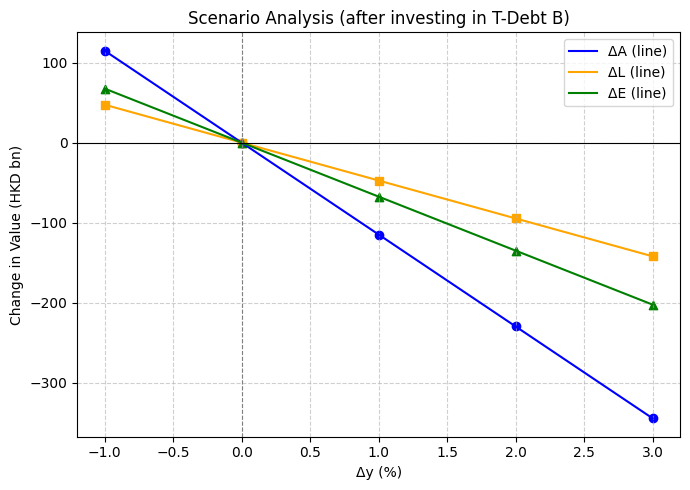

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A = 2000.0
L = 1700.0
E = 300.0

assets = [
    (300, 2.20, 0.145),
    (500, 11.50, 0.065),
    (300, 6.50, 0.048),
    (200, 0.0, 0.0),
]

liabilities = [
    (1400, 2.20, 0.032),
    (300, 5.80, 0.044),
]

x = 498.6
assets.append((x, 6.94, 0.041))

def delta_mv(items, dy):
    dmv = 0
    for mv, dur, y in items:
        if dur == 0:
            continue
        dmv += -dur * mv * (dy / (1 + y/2))
    return dmv

scenarios = [-0.01, 0.0, 0.01, 0.02, 0.03]
results = []
for dy in scenarios:
    dA = delta_mv(assets, dy)
    dL = delta_mv(liabilities, dy)
    dE = dA - dL
    results.append((dy*100, dA, dL, dE))

df = pd.DataFrame(results, columns=["Δy (%)", "ΔA (bn)", "ΔL (bn)", "ΔE (bn)"])
print(df.to_string(index=False))

dy_vals = np.array([r[0] for r in results])
dA_vals = np.array([r[1] for r in results])
dL_vals = np.array([r[2] for r in results])
dE_vals = np.array([r[3] for r in results])

def linear_formula(x, y):
    slope = (y[-1] - y[0]) / (x[-1] - x[0])
    intercept = y[0] - slope * x[0]
    return slope, intercept

slope_A, int_A = linear_formula(dy_vals, dA_vals)
slope_L, int_L = linear_formula(dy_vals, dL_vals)
slope_E, int_E = linear_formula(dy_vals, dE_vals)

print("\nLinear Functions (Δy in %):")
print(f"ΔA ≈ {slope_A:.6f} * Δy + {int_A:.6f}")
print(f"ΔL ≈ {slope_L:.6f} * Δy + {int_L:.6f}")
print(f"ΔE ≈ {slope_E:.6f} * Δy + {int_E:.6f}")

plt.figure(figsize=(7,5))

plt.plot(dy_vals, slope_A*dy_vals+int_A, "-", color="blue", label="ΔA (line)")
plt.scatter(dy_vals, dA_vals, color="blue", marker="o")

plt.plot(dy_vals, slope_L*dy_vals+int_L, "-", color="orange", label="ΔL (line)")
plt.scatter(dy_vals, dL_vals, color="orange", marker="s")

plt.plot(dy_vals, slope_E*dy_vals+int_E, "-", color="green", label="ΔE (line)")
plt.scatter(dy_vals, dE_vals, color="green", marker="^")

plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlabel("Δy (%)")
plt.ylabel("Change in Value (HKD bn)")
plt.title("Scenario Analysis (after investing in T-Debt B)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

